### Rukmal.M.A.D 190531L

In this part, we will generate an indexed image representing connected components in conveyor_f101.png image. Notice that, as there are three square nuts and one hexagonal nut in the image, there will be five connected components (backgound will be assigned the label 0).

Open the hexnut_template.png, squarenut_template.png and conveyor_f100.png and display. This is done for you

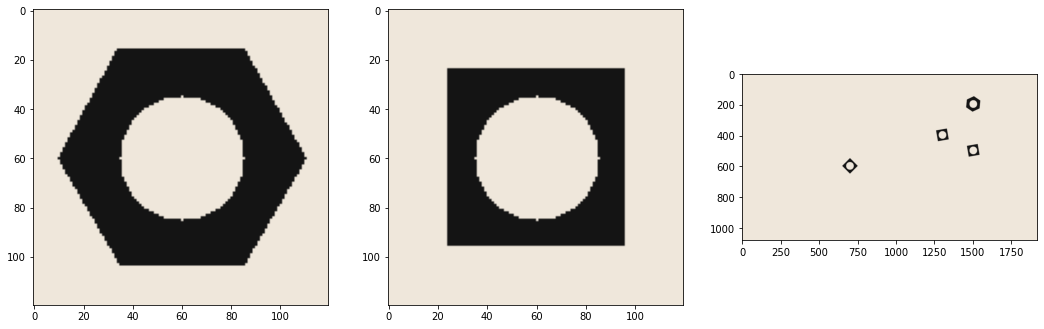

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

hexnut_template = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
squarenut_template =  cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
conveyor_f100 =  cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)

fig, ax = plt. subplots(1,3,figsize=(18,9))
ax[0].imshow(cv.cvtColor(hexnut_template, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(squarenut_template, cv.COLOR_RGB2BGR))
ax[2].imshow(cv.cvtColor(conveyor_f100, cv.COLOR_RGB2BGR))
plt.show()

Convert the images to grayscale and apply Otsu's thresholding to obtain the binarized image. Do this for both the templates and belt images. See https://docs.opencv.org/master/d7/d4d/tutorial_py_thresholding.html for a guide. State the threshold value (automatically) selected in the operation. Display the output images.

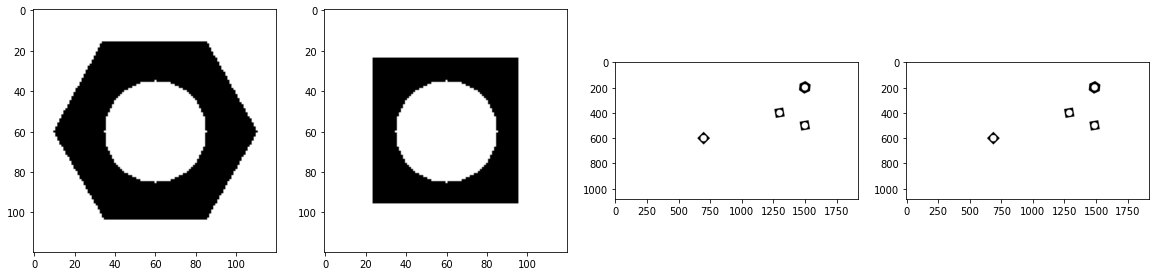

Threshold for hexnut =  20.0
Threshold for squarenut =  20.0
Threshold for f100 =  20.0
Threshold for f101 =  20.0


In [2]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

## open grayscale version of images
hexnut_template_gray = cv.imread('hexnut_template.png', cv.IMREAD_GRAYSCALE)
squarenut_template_gray =  cv.imread('squarenut_template.png', cv.IMREAD_GRAYSCALE)
conveyor_f100_gray =  cv.imread('conveyor_f100.png', cv.IMREAD_GRAYSCALE)
conveyor_f101_gray =  cv.imread('conveyor_f101.png', cv.IMREAD_GRAYSCALE)

#appliying otsu thresholding
th_hexnut,bin_hexnut = cv.threshold(hexnut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
th_squarenut,bin_squarenut = cv.threshold(squarenut_template_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
th_f100,bin_f100 = cv.threshold(conveyor_f100_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)
th_f101,bin_f101 = cv.threshold(conveyor_f101_gray,0,255,cv.THRESH_BINARY+cv.THRESH_OTSU)

fig, ax = plt. subplots(1,4, figsize=(20,10))
ax[0].imshow(cv.cvtColor(bin_hexnut, cv.COLOR_GRAY2BGR))
ax[1].imshow(cv.cvtColor(bin_squarenut, cv.COLOR_GRAY2BGR))
ax[2].imshow(cv.cvtColor(bin_f100, cv.COLOR_GRAY2BGR))
ax[3].imshow(cv.cvtColor(bin_f101, cv.COLOR_GRAY2BGR))

plt.show()
print("Threshold for hexnut = ",th_hexnut)
print("Threshold for squarenut = ",th_squarenut)
print("Threshold for f100 = ",th_f100)
print("Threshold for f101 = ",th_f101)

Carry out morphological closing to remove small holes inside the foreground. Use a 
3
×
3
 kernel. See https://docs.opencv.org/master/d9/d61/tutorial_py_morphological_ops.html for a guide.

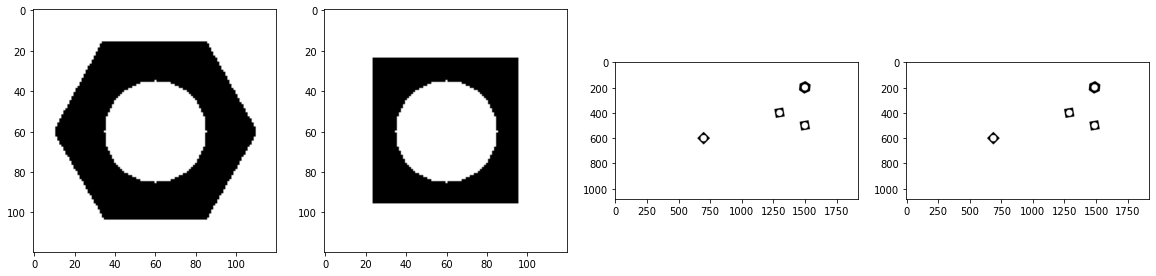

In [3]:
# creating 3x3 square kernel
kernel = cv.getStructuringElement(cv.MORPH_RECT,(3,3))

#closing holes in foreground
closing_hexnut = cv.morphologyEx(bin_hexnut, cv.MORPH_CLOSE, kernel)
closing_squarenut = cv.morphologyEx(bin_squarenut, cv.MORPH_CLOSE, kernel)
closing_f100 = cv.morphologyEx(bin_f100, cv.MORPH_CLOSE, kernel)
closing_f101 = cv.morphologyEx(bin_f101, cv.MORPH_CLOSE, kernel)

fig, ax = plt. subplots(1,4, figsize=(20,10))
ax[0].imshow(cv.cvtColor(closing_hexnut, cv.COLOR_GRAY2BGR))
ax[1].imshow(cv.cvtColor(closing_squarenut, cv.COLOR_GRAY2BGR))
ax[2].imshow(cv.cvtColor(closing_f100, cv.COLOR_GRAY2BGR))
ax[3].imshow(cv.cvtColor(closing_f101, cv.COLOR_GRAY2BGR))
plt.show()

Connected components analysis: apply the connectedComponentsWithStats function (see https://docs.opencv.org/4.5.5/d3/dc0/group__imgproc__shape.html#ga107a78bf7cd25dec05fb4dfc5c9e765f) and display the outputs as colormapped images. Answer the following questions
How many connected components are detected in each image?
What are the statistics? Interpret these statistics.
What are the centroids?
For the hexnut template, you should get the object area in pixel as approximately 4728

In [4]:
#Hexnut template
connectivity = 4
num_labels,labels,stats,centroids = cv.connectedComponentsWithStats(closing_hexnut, connectivity, cv.CV_32S)
print("Connected components = ",num_labels)
print("Statics = ",stats)
for i in range(num_labels):
    print("-----------COMPONENT - ",i ,"------------")
    print("left cordinate:")
    print(stats[i,cv.CC_STAT_LEFT])
    print("top cordinate:")
    print(stats[i,cv.CC_STAT_TOP])
    print("Width:")
    print(stats[i,cv.CC_STAT_WIDTH])
    print("Height:")
    print(stats[i,cv.CC_STAT_HEIGHT])
    print("Area:")
    print(stats[i,cv.CC_STAT_AREA])
print("centroids = ",centroids)

Connected components =  3
Statics =  [[  11   16   99   88 4722]
 [   0    0  120  120 7717]
 [  35   35   51   51 1961]]
-----------COMPONENT -  0 ------------
left cordinate:
11
top cordinate:
16
Width:
99
Height:
88
Area:
4722
-----------COMPONENT -  1 ------------
left cordinate:
0
top cordinate:
0
Width:
120
Height:
120
Area:
7717
-----------COMPONENT -  2 ------------
left cordinate:
35
top cordinate:
35
Width:
51
Height:
51
Area:
1961
centroids =  [[59.83354511 59.22257518]
 [59.168848   59.54269794]
 [60.         60.        ]]


In [5]:
#Squarenut template
connectivity = 4
num_labels,labels,stats,centroids = cv.connectedComponentsWithStats(closing_squarenut, connectivity, cv.CV_32S)
print("Connected components = ",num_labels)
print("Statics = ",stats)
for i in range(num_labels):
    print("-----------COMPONENT - ",i ,"------------")
    print("left cordinate:")
    print(stats[i,cv.CC_STAT_LEFT])
    print("top cordinate:")
    print(stats[i,cv.CC_STAT_TOP])
    print("Width:")
    print(stats[i,cv.CC_STAT_WIDTH])
    print("Height:")
    print(stats[i,cv.CC_STAT_HEIGHT])
    print("Area:")
    print(stats[i,cv.CC_STAT_AREA])
print("centroids = ",centroids)

Connected components =  3
Statics =  [[  24   24   72   72 3223]
 [   0    0  120  120 9216]
 [  35   35   51   51 1961]]
-----------COMPONENT -  0 ------------
left cordinate:
24
top cordinate:
24
Width:
72
Height:
72
Area:
3223
-----------COMPONENT -  1 ------------
left cordinate:
0
top cordinate:
0
Width:
120
Height:
120
Area:
9216
-----------COMPONENT -  2 ------------
left cordinate:
35
top cordinate:
35
Width:
51
Height:
51
Area:
1961
centroids =  [[59.19578033 59.19578033]
 [59.5        59.5       ]
 [60.         60.        ]]


In [6]:
#Conveyor_f100
connectivity = 4
num_labels,labels,stats,centroids = cv.connectedComponentsWithStats(closing_f100, connectivity, cv.CV_32S)
print("Connected components = ",num_labels)
print("Statics = ",stats)
for i in range(num_labels):
    print("-----------COMPONENT - ",i ,"------------")
    print("left cordinate:")
    print(stats[i,cv.CC_STAT_LEFT])
    print("top cordinate:")
    print(stats[i,cv.CC_STAT_TOP])
    print("Width:")
    print(stats[i,cv.CC_STAT_WIDTH])
    print("Height:")
    print(stats[i,cv.CC_STAT_HEIGHT])
    print("Area:")
    print(stats[i,cv.CC_STAT_AREA])
print("centroids = ",centroids)

Connected components =  6
Statics =  [[    651     151     895     499   13930]
 [      0       0    1920    1080 2051826]
 [   1475     175      51      51    1961]
 [   1275     375      51      51    1961]
 [   1475     475      51      51    1961]
 [    675     575      51      51    1961]]
-----------COMPONENT -  0 ------------
left cordinate:
651
top cordinate:
151
Width:
895
Height:
499
Area:
13930
-----------COMPONENT -  1 ------------
left cordinate:
0
top cordinate:
0
Width:
1920
Height:
1080
Area:
2051826
-----------COMPONENT -  2 ------------
left cordinate:
1475
top cordinate:
175
Width:
51
Height:
51
Area:
1961
-----------COMPONENT -  3 ------------
left cordinate:
1275
top cordinate:
375
Width:
51
Height:
51
Area:
1961
-----------COMPONENT -  4 ------------
left cordinate:
1475
top cordinate:
475
Width:
51
Height:
51
Area:
1961
-----------COMPONENT -  5 ------------
left cordinate:
675
top cordinate:
575
Width:
51
Height:
51
Area:
1961
centroids =  [[1275.02110553  400.1

In [7]:
#Conveyor_f101
connectivity = 4
num_labels,labels,stats,centroids = cv.connectedComponentsWithStats(closing_f101, connectivity, cv.CV_32S)
print("Connected components = ",num_labels)
print("Statics = ",stats)
for i in range(num_labels):
    print("-----------COMPONENT - ",i ,"------------")
    print("left cordinate:")
    print(stats[i,cv.CC_STAT_LEFT])
    print("top cordinate:")
    print(stats[i,cv.CC_STAT_TOP])
    print("Width:")
    print(stats[i,cv.CC_STAT_WIDTH])
    print("Height:")
    print(stats[i,cv.CC_STAT_HEIGHT])
    print("Area:")
    print(stats[i,cv.CC_STAT_AREA])
print("centroids = ",centroids)

Connected components =  6
Statics =  [[    641     151     895     499   13930]
 [      0       0    1920    1080 2051826]
 [   1465     175      51      51    1961]
 [   1265     375      51      51    1961]
 [   1465     475      51      51    1961]
 [    665     575      51      51    1961]]
-----------COMPONENT -  0 ------------
left cordinate:
641
top cordinate:
151
Width:
895
Height:
499
Area:
13930
-----------COMPONENT -  1 ------------
left cordinate:
0
top cordinate:
0
Width:
1920
Height:
1080
Area:
2051826
-----------COMPONENT -  2 ------------
left cordinate:
1465
top cordinate:
175
Width:
51
Height:
51
Area:
1961
-----------COMPONENT -  3 ------------
left cordinate:
1265
top cordinate:
375
Width:
51
Height:
51
Area:
1961
-----------COMPONENT -  4 ------------
left cordinate:
1465
top cordinate:
475
Width:
51
Height:
51
Area:
1961
-----------COMPONENT -  5 ------------
left cordinate:
665
top cordinate:
575
Width:
51
Height:
51
Area:
1961
centroids =  [[1265.02110553  400.1

Contour analysis: Use findContours function to retrieve the extreme outer contours. (see https://docs.opencv.org/4.5.2/d4/d73/tutorial_py_contours_begin.html for help and https://docs.opencv.org/4.5.2/d3/dc0/group__imgproc__shape.html#gadf1ad6a0b82947fa1fe3c3d497f260e0 for information.
Display these contours. 

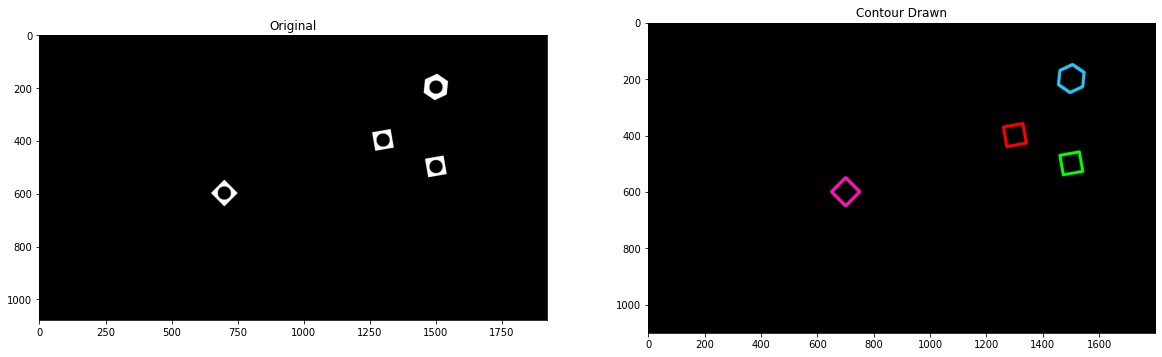

In [8]:
#open the image
f100 = cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
gray_f100 = cv.cvtColor(f100, cv.COLOR_BGR2GRAY)

#inverte the image
transform = np.arange(255,-1,-1).astype('uint8')
inv_f100 = cv.LUT(gray_f100,transform)

# binarize the image
ret, thresh_f100 = cv.threshold(inv_f100, 0, 255, cv.THRESH_OTSU)

#finding contours
contours, hierarchy = cv.findContours(thresh_f100, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)


height = 1100
width = 1800
img = np.zeros((height,width,3), np.uint8)


#draw contours
cv.drawContours(img, contours,0, (178,22,245), 10)
cv.drawContours(img, contours,2, (0,255,0), 10)
cv.drawContours(img, contours,4, (0,0,255), 10)
cv.drawContours(img, contours,6, (245,195,45), 10)


fig, ax = plt. subplots(1,2, figsize=(20,10))
ax[0].imshow(cv.cvtColor(thresh_f100, cv.COLOR_RGB2BGR))
ax[1].imshow(cv.cvtColor(img, cv.COLOR_RGB2BGR))
ax[0].set_title("Original")
ax[1].set_title("Contour Drawn")
plt.show()






## Detecting Objects on a Synthetic Conveyor

In this section, we will use the synthetic conveyor.mp4 sequence to count the two types of nuts.

Open the sequence and play it using the code below

In [22]:
cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor_result_190531L.mp4')
f = 0
frame = []      
while cap.isOpened():                                    
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break

    f += 1
    text = 'Frame:' + str(f)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 1, cv.LINE_AA)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()

Count the number of matching hexagonal nuts in conveyor_f100.png. You can use matchCountours function as shown in https://docs.opencv.org/4.5.2/d5/d45/tutorial_py_contours_more_functions.html to match contours in each frame with that in th template.

In [2]:
#contours of hexagonal nut
import cv2 as cv
import numpy as np
hexnut = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
gray_hexnut = cv.cvtColor(hexnut, cv.COLOR_BGR2GRAY)
transform = np.arange(255,-1,-1).astype('uint8')
inv_hexnut = cv.LUT(gray_hexnut,transform)
ret, thresh_hexnut = cv.threshold(inv_hexnut, 0, 255, cv.THRESH_OTSU)
contours_hexnut, hierarchy = cv.findContours(thresh_hexnut, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#contours of f100 frame
f100 = cv.imread('conveyor_f100.png', cv.IMREAD_COLOR)
gray_f100 = cv.cvtColor(f100, cv.COLOR_BGR2GRAY)
transform = np.arange(255,-1,-1).astype('uint8')
inv_f100 = cv.LUT(gray_f100,transform)
ret, thresh_f100 = cv.threshold(inv_f100, 0, 255, cv.THRESH_OTSU)
contours_f100, hierarchy = cv.findContours(thresh_f100, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

sep_threshold =0.01 
count = 0
for i in range(0,len(contours_f100)-1):
    if i%2==0:
        ret = cv.matchShapes(contours_hexnut[0],contours_f100[i],1,0.0)
        if ret<=sep_threshold:
            count+=1
print("Number of hexnuts = ",count)
        

Number of hexnuts =  1


Count the number of objects that were conveyed along the conveyor belt: Display the count in the current frame and total count upto the current frame in the output video. Please compress your video (using Handbreak or otherwise) before uploading. It would be good to experiment first with the two adjacent frames conveyor_f100.png and conveyor_f101.png. In order to disregard partially appearing nuts, consider comparing the contour area in addition to using the matchCountours function

In [2]:
#contours of hexagonal nut
import cv2 as cv
import numpy as np
hexnut = cv.imread('hexnut_template.png', cv.IMREAD_COLOR)
gray_hexnut = cv.cvtColor(hexnut, cv.COLOR_BGR2GRAY)
transform = np.arange(255,-1,-1).astype('uint8')
inv_hexnut = cv.LUT(gray_hexnut,transform)
ret, thresh_hexnut = cv.threshold(inv_hexnut, 0, 255, cv.THRESH_OTSU)
contours_hexnut, hierarchy = cv.findContours(thresh_hexnut, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

#contours of square nut
squarenut = cv.imread('squarenut_template.png', cv.IMREAD_COLOR)
gray_squarenut = cv.cvtColor(squarenut, cv.COLOR_BGR2GRAY)
transform = np.arange(255,-1,-1).astype('uint8')
inv_squarenut = cv.LUT(gray_squarenut,transform)
ret, thresh_squarenut = cv.threshold(inv_squarenut, 0, 255, cv.THRESH_OTSU)
contours_squarenut, hierarchy = cv.findContours(thresh_squarenut, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)

def frame_contour_generator(frame):
    gray_frame = cv.cvtColor(frame, cv.COLOR_BGR2GRAY)
    transform = np.arange(255,-1,-1).astype('uint8')
    inv_frame = cv.LUT(gray_frame,transform)
    ret, thresh_frame = cv.threshold(inv_frame, 0, 255, cv.THRESH_OTSU)
    contours_frame, hierarchy = cv.findContours(thresh_frame, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
    return contours_frame

frame_array = []

cv.namedWindow('Conveyor', cv.WINDOW_NORMAL)
cap = cv.VideoCapture('conveyor.mp4')
f = 0
frame = []
total_obj = 0
while cap.isOpened():
    obj_count = 0
    ret, frame = cap.read()
    if not ret:
        print("Can't receive frame (stream end?). Exiting.")
        break
    contours = frame_contour_generator(frame)
    for i in range(0,len(contours)):
        ret_hex = cv.matchShapes(contours_hexnut[0],contours[i],1,0.0)
        ret_sq = cv.matchShapes(contours_squarenut[0],contours[i],1,0.0)
        if (ret_hex<=0.01 or ret_sq<=0.01) and ((cv.contourArea(contours[i])<5100 and
                                                 cv.contourArea(contours[i])>4900) or (cv.contourArea(contours[i])<6550 
                                                                                       and cv.contourArea(contours[i])>6350) ):
            obj_count+=1
            M = cv.moments(contours[i])
            cx = int(M['m10']/M['m00'])
            if 1000<=cx and cx<=1009:
                total_obj+=1
        
    
    
    f += 1
    text = 'Frame:' + str(f) + "  Obj :" + str(obj_count) + "  Total Obj :" + str(total_obj)
    cv.putText(frame,text , (100, 100), cv.FONT_HERSHEY_COMPLEX, 1, (0,250,0), 2, cv.LINE_AA)
    # frame = cv.resize(frame, (1080, 540)) # Resize image 
    frame_array.append(frame)
    cv.imshow('Conveyor', frame)

    if cv.waitKey(1) == ord('q'):  
        break

cap.release()
cv.destroyAllWindows()


#Writing the video


shape = (1080, 1920, 3)

# Your code here


out = cv.VideoWriter('./conveyor_result_190531L.mp4',cv.VideoWriter_fourcc(*'h264'), 30, (shape[1], shape[0]))
 
for i in range(len(frame_array)):
    cv.imshow('Frame', frame_array[i])
    if cv.waitKey(1) == ord('q'):
        break
    out.write(frame_array[i])

out.release()
cv.destroyAllWindows()

Can't receive frame (stream end?). Exiting.


## Github link

https://github.com/DilukshaRukmal/Computer_vision.git